
## **Soal 1 - Jamur Beracun 🍄**

UCI (_University of California, Irvine_) menyediakan dataset karakteristik sampel dari sekitar 23 spesies jamur, yang diambil dari buku ilmiah _The Audubon Society Field Guide_ dan _North American Mushroom_. Setiap spesies diidentifikasi sebagai jamur yang dapat dimakan atau jamur beracun yang tidak dapat dikonsumsi. Unduh dataset __*mushrooms.csv*__ [di sini](./datasets/mushrooms.csv). Data terdiri atas 23 kolom dengan detail categorical value sebagai berikut.
- __classes__: e = edible, p = poisonous
- __cap-shape__: b = bell, c = conical, x = convex, f = flat, k = knobbed, s = sunken
- __cap-surface__: f = fibrous,g = grooves, y = scaly, s = smooth
- __cap-color__: n = brown, b = buff, c = cinnamon, g = gray, r = green, p = pink, u = purple, e = red, w = white,y = yellow
- __bruises__: t = bruises, f = no
- __odor__: a = almond, l = anise, c = creosote, y = fishy, f = foul, m = musty, n = none, p = pungent, s = spicy
- __gill-attachment__: a = attached, d = descending, f = free, n = notched
- __gill-spacing__: c = close, w = crowded, d = distant
- __gill-size__: b = broad, n = narrow
- __gill-color__: k = black, n = brown, b = buff, h = chocolate, g = gray, r = green, o = orange, p = pink, u = purple, e = red, w = white, y = yellow
- __stalk-shape__:  e = enlarging, t = tapering
- __stalk-root__: b = bulbous, c = club, u = cup, e = equal, z = rhizomorphs, r = rooted, ? = missing
- __stalk-surface-above-ring__: f = fibrous, y = scaly, k = silky, s = smooth
- __stalk-surface-below-ring__: f = fibrous, y = scaly, k = silky, s = smooth
- __stalk-color-above-ring__: n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow
- __stalk-color-below-ring__: n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow
- __veil-type__: p = partial, u = universal
- __veil-color__: n = brown, o = orange, w = white, y = yellow
- __ring-number__: n = none, o = one, t = two
- __ring-type__: c = cobwebby, e = evanescent, f = flaring, l = large, n = none, p = pendant s = sheathing, z = zone
- __spore-print-color__: k = black, n = brown, b = buff, h = chocolate, r = green, o = orange, u = purple, w = white, y = yellow
- __population__: a = abundant, c = clustered, n = numerous, s = scattered, v = several, y = solitary
- __habitat__: g = grasses, l = leaves, m = meadows, p = paths, u = urban, w = waste, d = woods

Buatlah sebuah file notebook (_.ipynb_) yang menjelaskan tata cara pembuatan model machine learning untuk mengklasifikasikan mana jamur yang dapat dikonsumsi dan mana jamur yang beracun berdasarkan dataset tersebut. Anda bebas menggunakan model apapun, sertakan pula evaluation metrics dan plot ROC AUC-nya.

__Requirements:__

- Buat sebuah file __notebook__ (_.ipynb_).
- Unduh & gunakan dataset [__*mushrooms.csv*__](./datasets/mushrooms.csv).
- Buat model yang dapat mengklasifikasikan jamur beracun dan tidak. Algoritma model bebas.
- Tentukan & hitung metriks evaluasi model.
- Gambarkan plot ROC AUC model.


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [55]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Cleaning Data

In [40]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## EDA

In [41]:
cols = df.columns
y = []
for i in cols:
    x = df[i].value_counts()
    y.append(x)
y

[e    4208
 p    3916
 Name: class, dtype: int64, x    3656
 f    3152
 k     828
 b     452
 s      32
 c       4
 Name: cap-shape, dtype: int64, y    3244
 s    2556
 f    2320
 g       4
 Name: cap-surface, dtype: int64, n    2284
 g    1840
 e    1500
 y    1072
 w    1040
 b     168
 p     144
 c      44
 r      16
 u      16
 Name: cap-color, dtype: int64, f    4748
 t    3376
 Name: bruises, dtype: int64, n    3528
 f    2160
 y     576
 s     576
 a     400
 l     400
 p     256
 c     192
 m      36
 Name: odor, dtype: int64, f    7914
 a     210
 Name: gill-attachment, dtype: int64, c    6812
 w    1312
 Name: gill-spacing, dtype: int64, b    5612
 n    2512
 Name: gill-size, dtype: int64, b    1728
 p    1492
 w    1202
 n    1048
 g     752
 h     732
 u     492
 k     408
 e      96
 y      86
 o      64
 r      24
 Name: gill-color, dtype: int64, t    4608
 e    3516
 Name: stalk-shape, dtype: int64, b    3776
 ?    2480
 e    1120
 c     556
 r     192
 Name: stalk-root,

In [57]:
clas = df['class'].value_counts()
clas

e    4208
p    3916
Name: class, dtype: int64

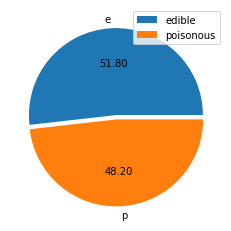

In [59]:
plt.pie(clas.values,labels=['e','p'],autopct='%.2f',explode=[0,0.05])
plt.legend(['edible','poisonous'])
plt.show()

- Dataset memiliki class yang balance, hal ini bisa dilihat dari grafik diatas, perbedaan class tidak signifikan
- Semua data bersifat kategori, kolom 'class' sebagai label/target dan selebihnya merupakan feature, kita akan ubah kolom 'class' menjadi tipe binary, kolom feature akan kita buat dummy variable.

## Data Manipulation

In [42]:
df['class'] = df['class'].map({'e':0,'p':1})
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [43]:
var_dummy = df.drop(columns='class')
df_dummy = pd.get_dummies(data=var_dummy)
df_dummy.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
## concat 2 dataframe

dfMsh = pd.concat([df_dummy,df['class']],axis=1)
dfMsh.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## Build Model

- Algoritma model yang kita gunakan adalah Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, dan Support Vector Classifier dengan parameter default

- Dataset kita split dengan proporsi 75:25 untuk train dan test data

In [45]:
feature = dfMsh.drop(columns=['class'])
target = dfMsh['class']
train_X,test_X,train_Y,test_Y = train_test_split(feature,target,test_size = .25,random_state=123)

In [29]:
### Logistic Regression
lr = LogisticRegression()
lr.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# Decision Tree
dct = DecisionTreeClassifier()
dct.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
# RandomForest
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
# KNN
def k(x):
    k = int(np.sqrt(x))
    if k % 2 == 0:
        k += 1
        return k
    else:
        return k
## len for k
k(len(train_X)) #79
knn = KNeighborsClassifier(n_neighbors=79)
knn.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=79, p=2,
                     weights='uniform')

In [48]:
# Support vector
svc = SVC()
svc.fit(train_X,train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Cross Validation

Kita akan gunakan Cross Validation untuk memvalidasi model, fold yang kita gunakan adalah 5

In [49]:
log_cv = cross_val_score(lr,train_X,train_Y,cv=5)*100
dct_cv = cross_val_score(dct,train_X,train_Y,cv=5)*100
rf_cv = cross_val_score(rf,train_X,train_Y,cv=5)*100
knn_cv = cross_val_score(knn,train_X,train_Y,cv=5)*100
svc_cv = cross_val_score(svc,train_X,train_Y,cv=5)*100

In [50]:
print(f'Logistic Regression : {log_cv.mean()}')
print(f'Decision Tree : {dct_cv.mean()}')
print(f'Random Forest : {rf_cv.mean()}')
print(f'KNN : {knn_cv.mean()}')
print(f'SVC : {svc_cv.mean()}')

Logistic Regression : 99.95077932731746
Decision Tree : 100.0
Random Forest : 100.0
KNN : 99.01519590609009
SVC : 99.96718621821165


Dua algoritma terbaik berdasarkan rata-rata cross validation adalah Decision Tree dan Random Forest

In [51]:
pred_lr = lr.predict(test_X)
pred_dt = dct.predict(test_X)
pred_rf = rf.predict(test_X)
pred_knn = knn.predict(test_X)
pred_svc = svc.predict(test_X)

print('Logistic Regressin\n',classification_report(test_Y,pred_lr))
print('\n\nDecision Tree\n',classification_report(test_Y,pred_dt))
print('\n\nRandom Forest\n',classification_report(test_Y,pred_rf))
print('\n\nKNN\n',classification_report(test_Y,pred_knn))
print('\n\nSVC\n',classification_report(test_Y,pred_svc))

Logistic Regressin
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Random Forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1

- Dari 5 algoritma model di atas, semua model menunjukan peforma yang baik, untuk KNN peforma model sedikit lebih buruk dibanding yang lain.

- Dataset memiliki class yang balance, untuk class 0 = 4208 dan untuk class 1 = 3916 (ini bisa dilihat di EDA). Jadi kita akan menggunakan nilai Accuracy Score sebagai acuan evaluasi matrix

- Data test terdiri dari class 0 = 1069 dan class 1 = 962, semua nilai accuracy dari model adalah 1, kecuali KNN

### Plot ROC-AUC

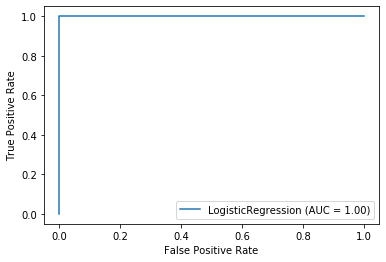

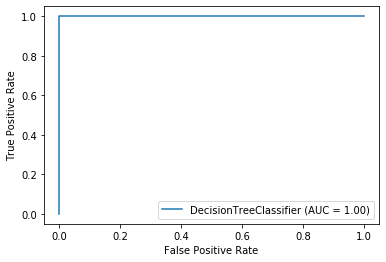

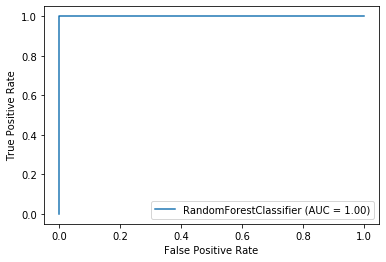

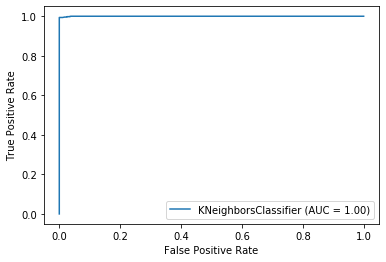

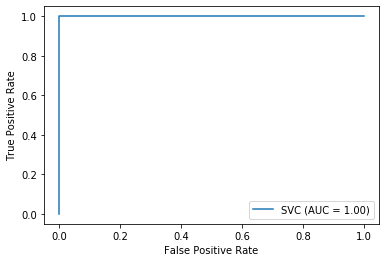

In [52]:
plot_roc_curve(lr,test_X,test_Y)
plot_roc_curve(dct,test_X,test_Y)
plot_roc_curve(rf,test_X,test_Y)
plot_roc_curve(knn,test_X,test_Y)
plot_roc_curve(svc,test_X,test_Y)

Nilai AUC untuk 5 model di atas menunjukan nilai yang sempurna yaitu AUC = 1, semua model memiliki peforma yang sama baiknya

### Confusion Metrics

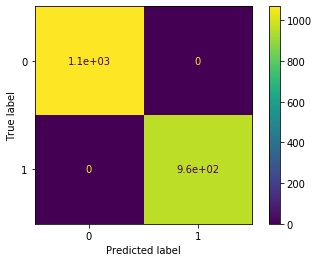

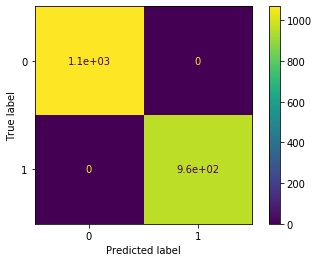

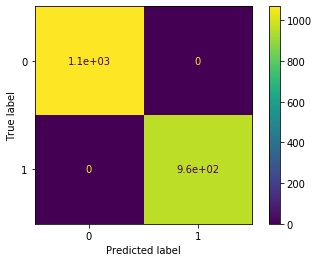

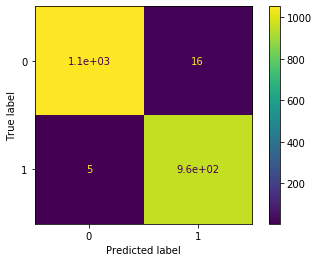

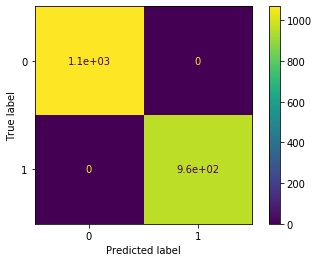

In [53]:
plot_confusion_matrix(lr,test_X,test_Y)
plot_confusion_matrix(dct,test_X,test_Y)
plot_confusion_matrix(rf,test_X,test_Y)
plot_confusion_matrix(knn,test_X,test_Y)
plot_confusion_matrix(svc,test_X,test_Y)

Tabel confusion matrix menunjukan bahwa semua class bisa diklasifikasi dengan benar, kecuali untuk model KNN yang memiliki False Positive = 16 dan False Negative = 5. Semua model sudah menunjukan peforma terbaik, jadi kita tidak perlu melakukan Hyper Parameter Tuning.

## Best Model

- Terdapat 4 Model yang menunjukan peforma sama baiknya, yaitu Logistic regression, Decision Tree, Random Forest, dan SVC

- Dari 4 model tersebut terdapat 2 model yang memiliki rata-rata corss validation tertinggi yaitu Decision Tree dan Random Forest

- Saya akan memilih Decision Tree sebagai model terbaik dibanding Random Forest karena Decision Tree cenderung lebih ringan dan dapat menunjukan peforma sama baiknya dengan Random Forest dalam kasus ini